### Neste capítulo veremos outro tipo de join e alguns recursos adicionais do pandas. Veremos:
1. Função pd.merge_asof()
2. pd.query()
3. pd.melt()

In [1]:
import pandas as pd
import numpy as np

### O join da função pd.merge_asof é utilizada quando não se tem um match exato entre as duas tabelas e podemos impor uma regra para o match, por exemplo: maior ou igual, menor ou igual ou a chave mais próxima. Serve para match de chaves numéricas e datas, aparentemente.

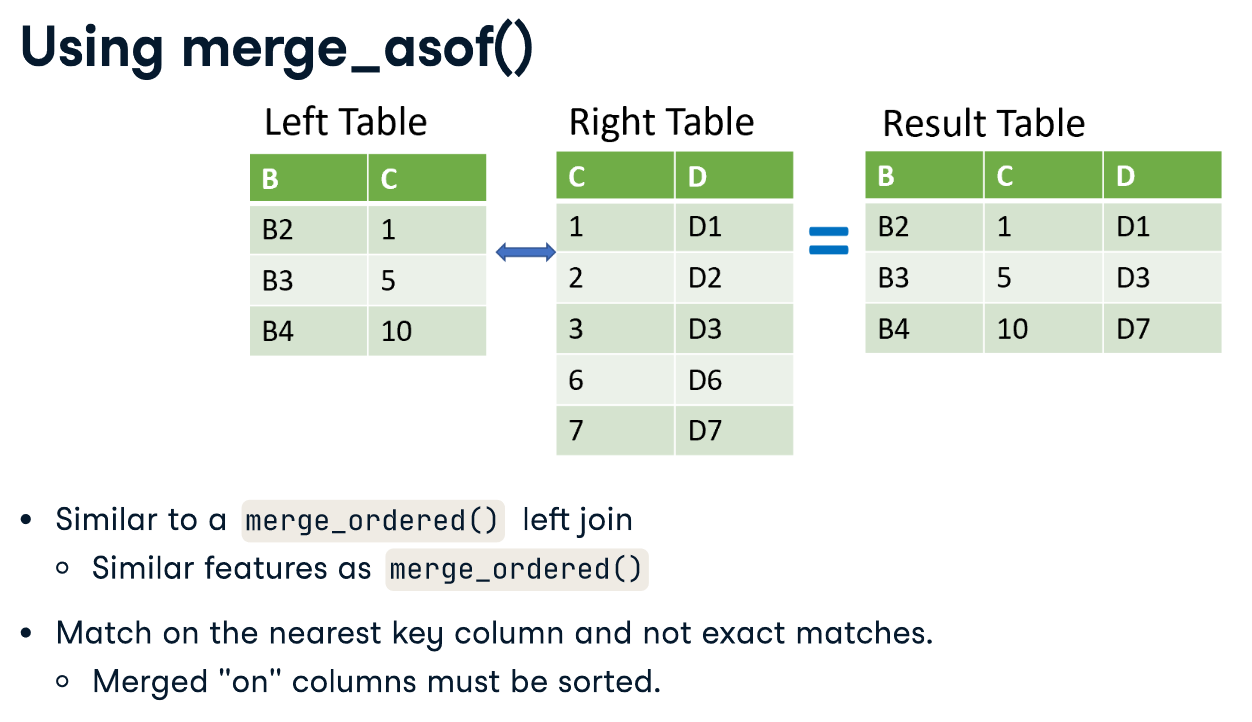

## Exemplo:
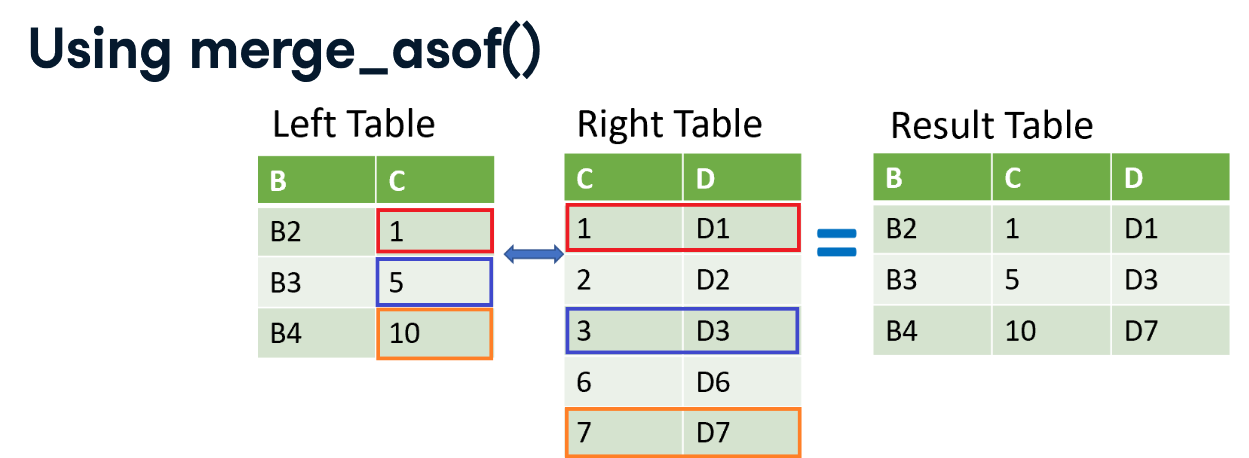

In [2]:
left = pd.DataFrame({'a': [1, 5, 10], 'left_val': ['a', 'b', 'c']})
left

,a,left_val
0,1,a
1,5,b
2,10,c


In [3]:
right = pd.DataFrame({'a': [1, 2, 3, 6, 7],
                       'right_val': [1, 2, 3, 6, 7]})
right

,a,right_val
0,1,1
1,2,2
2,3,3
3,6,6
4,7,7


In [4]:
pd.merge_asof(left, right, on='a', direction='backward')

,a,left_val,right_val
0,1,a,1
1,5,b,3
2,10,c,7


In [5]:
pd.merge_asof(left, right, on='a', direction='forward')

,a,left_val,right_val
0,1,a,1.0
1,5,b,6.0
2,10,c,NaN


In [6]:
pd.merge_asof(left, right, on='a', direction='nearest')

,a,left_val,right_val
0,1,a,1
1,5,b,6
2,10,c,7


### A função query() permite que façamos uma seleção dos dados com uma estrutua similar a parte de WHERE do SQL.

In [15]:
dados=pd.DataFrame({'A': range(1, 6),
                   'B': range(10, 0, -2),
                   "tipo":["C", "C", "D", "D", "C"]})
dados

,A,B,tipo
0,1,10,C
1,2,8,C
2,3,6,D
3,4,4,D
4,5,2,C


In [8]:
dados.query('A>=3')

,A,B,tipo
2,3,6,B
3,4,4,B
4,5,2,A


In [12]:
dados.query('A > B')

,A,B,tipo
4,5,2,A


In [18]:
dados.query('(A > B) and (tipo=="C")')

,A,B,tipo
4,5,2,C


In [19]:
dados.query('(A > B) or (tipo=="C")')

,A,B,tipo
0,1,10,C
1,2,8,C
4,5,2,C


### Também existe a função melt para reajustarmos os dados para o formato longo ao invés do formato tradicional

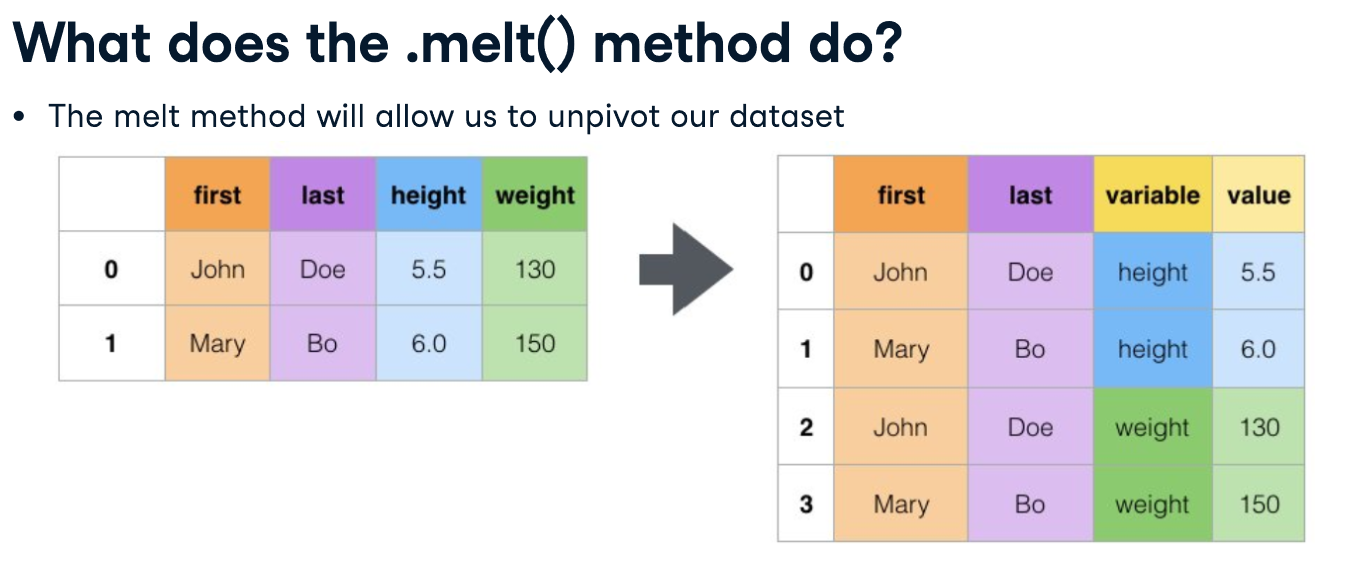

### Dúvidas: Consultar pdf dessa parte do datacamp